# Plotting model fits to data using `results_loader()` and `LIET_ax()`

In [1]:
import sys
print(sys.version)
sys.path.append('/Users/hoto7260/Jacob_LIET2/LIET/liet')

from liet_res_class import FitParse, fitparse_intersect
from rnap_lib_fitting_results import results_loader
import rnap_lib_plotting as rp

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

3.10.6 | packaged by conda-forge | (main, Aug 22 2022, 20:36:39) [GCC 10.4.0]


In [28]:
# Define genes & working directory
#gene_list = ['BHLHE41', 'SMC3', 'RBX1', 'DYNLL2', 'CHMP4B', 
#             'CCDC102A', 'SOCS1', 'TET1','SESN2']
gene_list = ['SLC25A5']
# BHLHE41: ly,ph Blum64
# DYNLL2: 34ery first 3
# CHMP4B: Tan29 mcf7
# CCDC102A: Tan29 mcf7 & lymph Blum64
# SOCS1: 3rd 34ery 
# TET1: Blum64
# SLC25A5: Rao23 or g401 E32

# ones to do:
# lymph Blum64, 3rd 34ery, Tan29 mcf7, Rao23

### See where the annotated starts & ends of the genes are

In [29]:
for gene in gene_list:
    print(gene)
    print(lymph_SR44.annotations[gene])
    print("strand: ", lymph_SR44.annotations[gene][3])
    print("length: ", abs(lymph_SR44.annotations[gene][1]-lymph_SR44.annotations[gene][2]))

SLC25A5
('chrX', 119468516, 119471055, 1)
strand:  1
length:  2539


# k562 Blum 64

In [24]:
# k562 2a: SRR12083664
log_file = "/scratch/Users/hoto7260/batch_out_files/LIETfirstSRRtests/LIETtest_run10.3/SRR12083664.10ksamp2_2_Hope_nomLab10.3.liet.log"
results_file = "/scratch/Users/hoto7260/batch_out_files/LIETfirstSRRtests/LIETtest_run10.3/SRR12083664.10ksamp2_2_Hope_nomLab10.3.liet"
config_file = "/scratch/Users/hoto7260/batch_out_files/LIETfirstSRRtests/LIETtest_run10.3/SRR12083664.10ksamp_nomLa10.3.liet.config"
k562_SR64 = pf.FitParse(res_file=results_file, log_file=log_file)
gene_results2 = res_dict = results_loader(gene_list, config=config_file, result=results_file, log=log_file)

ML, MT (preflip): 3.08, 12446.24
ML, MT, ML_A: -3.08, -12446.24, 3.08
xvals range: -32709, 9999
P DATA RANGE: -19099, -19052
N DATA RANGE: -31263, -2803
xvals range: -10000, 66480
P DATA RANGE: -7454, 57115
N DATA RANGE: -9895, 66197
xvals range: -10000, 51084
P DATA RANGE: -10000, 48455
N DATA RANGE: -9957, 50903
xvals range: -10000, 32183
P DATA RANGE: -8341, 26514
N DATA RANGE: -9825, 31720
xvals range: -10000, 72086
P DATA RANGE: -7856, 68580
N DATA RANGE: -8001, 70299
ML, MT (preflip): 0.8, 18034.43
ML, MT, ML_A: -0.8, -18034.43, 0.8
xvals range: -46432, 9999
P DATA RANGE: -41004, 9998
N DATA RANGE: -46433, 8175
ML, MT (preflip): 0.42, 4269.8
ML, MT, ML_A: -0.42, -4269.8, 0.42
xvals range: -30631, 9999
P DATA RANGE: -30612, 9555
N DATA RANGE: -28660, 7111
xvals range: -10000, 149470
P DATA RANGE: -10000, 149470
N DATA RANGE: -9984, 149415
xvals range: -10000, 50949
P DATA RANGE: -8885, 48268
N DATA RANGE: -9120, 50949


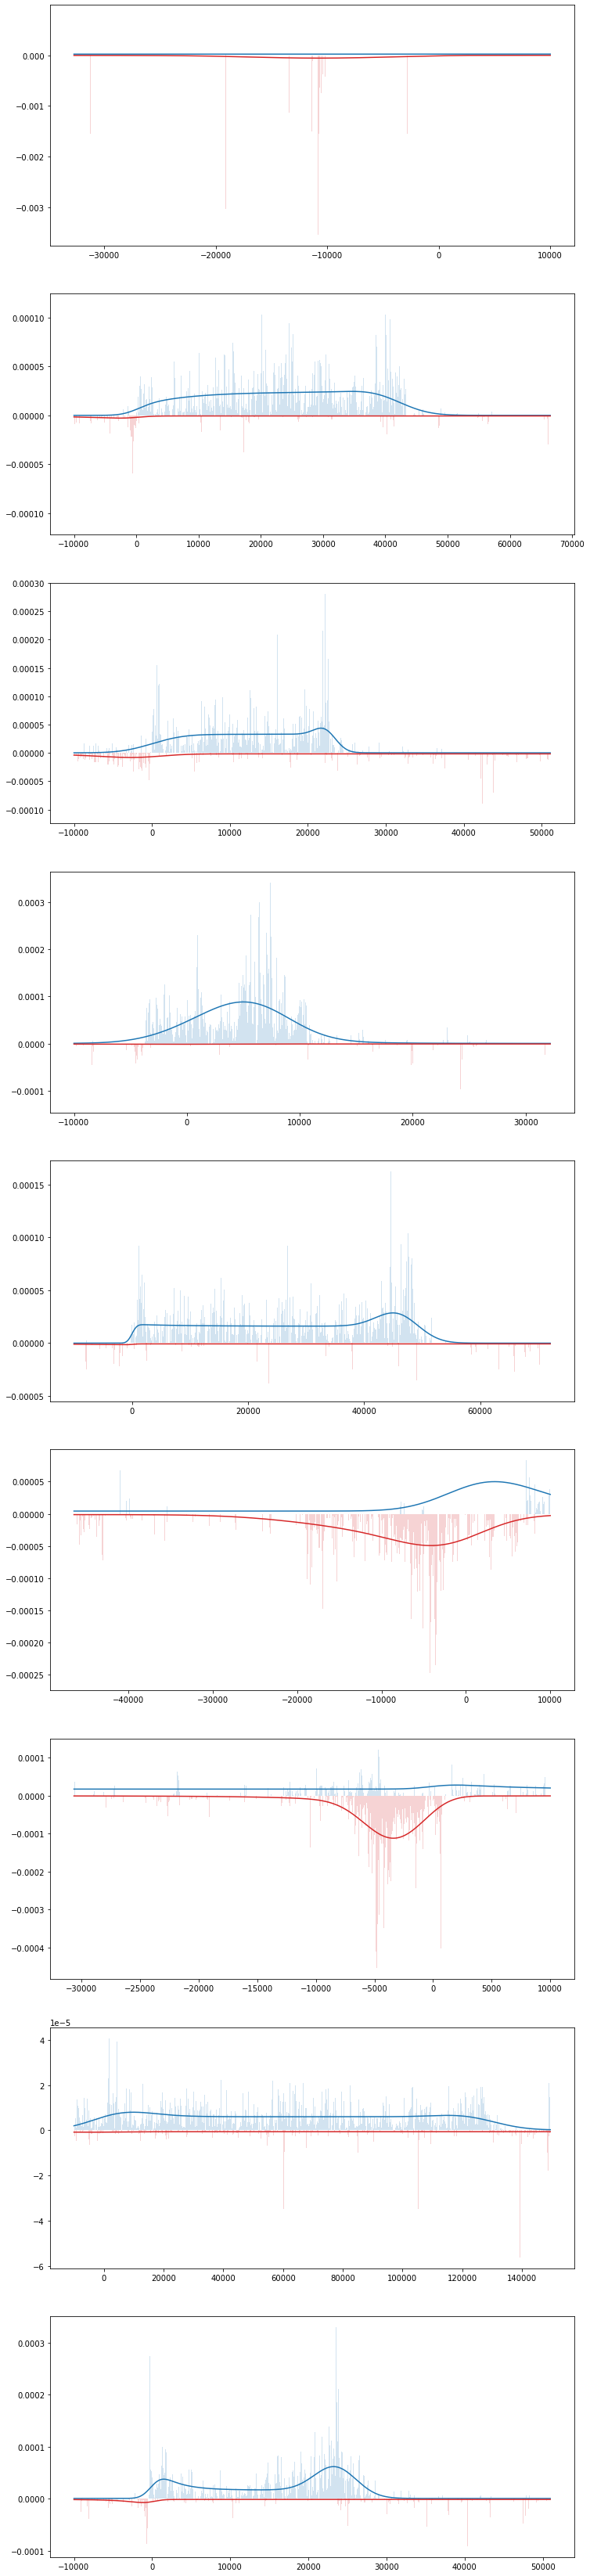

In [25]:
ngenes = len(gene_list)

fig = plt.figure(figsize=[12,60])
gs = GridSpec(ngenes, 1)
axes = [fig.add_subplot(gs[i, :]) for i in range(ngenes)]

for gid, ax in zip(gene_list, axes):
    
    xvals2, preads2, nreads2, strand2, model_params2 = gene_results2[gid]
    
    rp.LIET_ax(
        ax,
        **model_params2,
        strand = strand2,
        xvals = xvals2,
        data = (preads2, nreads2),
        nbins = 1000,
    )
plt.show()

# Lymph Blum 44
## Define input files and genes to plot & 
## Extract results with `results_loader()`
* Dictionary keyed on gene IDs, with value = `(xvals, preads, nreads, strand, model_params)`

In [5]:
# lypmh 1b: SRR6727944
log_file = "/Users/hoto7260/LIET_cell_type/lymph/output/SRR6727944.lymph.1030.liet.log"
results_file = "/Users/hoto7260/LIET_cell_type/lymph/output/SRR6727944.lymph.1030.liet"
config_file = "/Users/hoto7260/LIET_cell_type/lymph/configs/SRR6727944.lymph.config"
lymph_SR44 = FitParse(res_file=res_file, log_file=log_file)

gene_results = res_dict = results_loader(gene_list, config=config_file, result=results_file, log=log_file)

## Plot each of the gene fits with `LIET_ax()`

ML, MT (preflip): -27.15, 10647.75
ML, MT, ML_A: 27.15, -10647.75, -27.15
xvals range: -32709, 9999
P DATA RANGE: -32021, 9348
N DATA RANGE: -31252, 6183
xvals range: -10000, 66480
P DATA RANGE: -7458, 66012
N DATA RANGE: -9802, 66310
xvals range: -10000, 51084
P DATA RANGE: -9907, 50946
N DATA RANGE: -9245, 49877
xvals range: -10000, 32183
P DATA RANGE: -3829, 31631
N DATA RANGE: -8368, 24263
xvals range: -10000, 72086
P DATA RANGE: -8002, 72054
N DATA RANGE: -7946, 72033
ML, MT (preflip): 40.66, 18361.03
ML, MT, ML_A: -40.66, -18361.03, 40.66
xvals range: -46432, 9999
P DATA RANGE: -45810, 9969
N DATA RANGE: -46350, 9992
ML, MT (preflip): -38.53, 4166.83
ML, MT, ML_A: 38.53, -4166.83, -38.53
xvals range: -30631, 9999
P DATA RANGE: -30626, 9989
N DATA RANGE: -30628, 8809
xvals range: -10000, 149470
P DATA RANGE: -8844, 149469
N DATA RANGE: -8596, 149414
xvals range: -10000, 50949
P DATA RANGE: -9996, 50560
N DATA RANGE: -9100, 50604


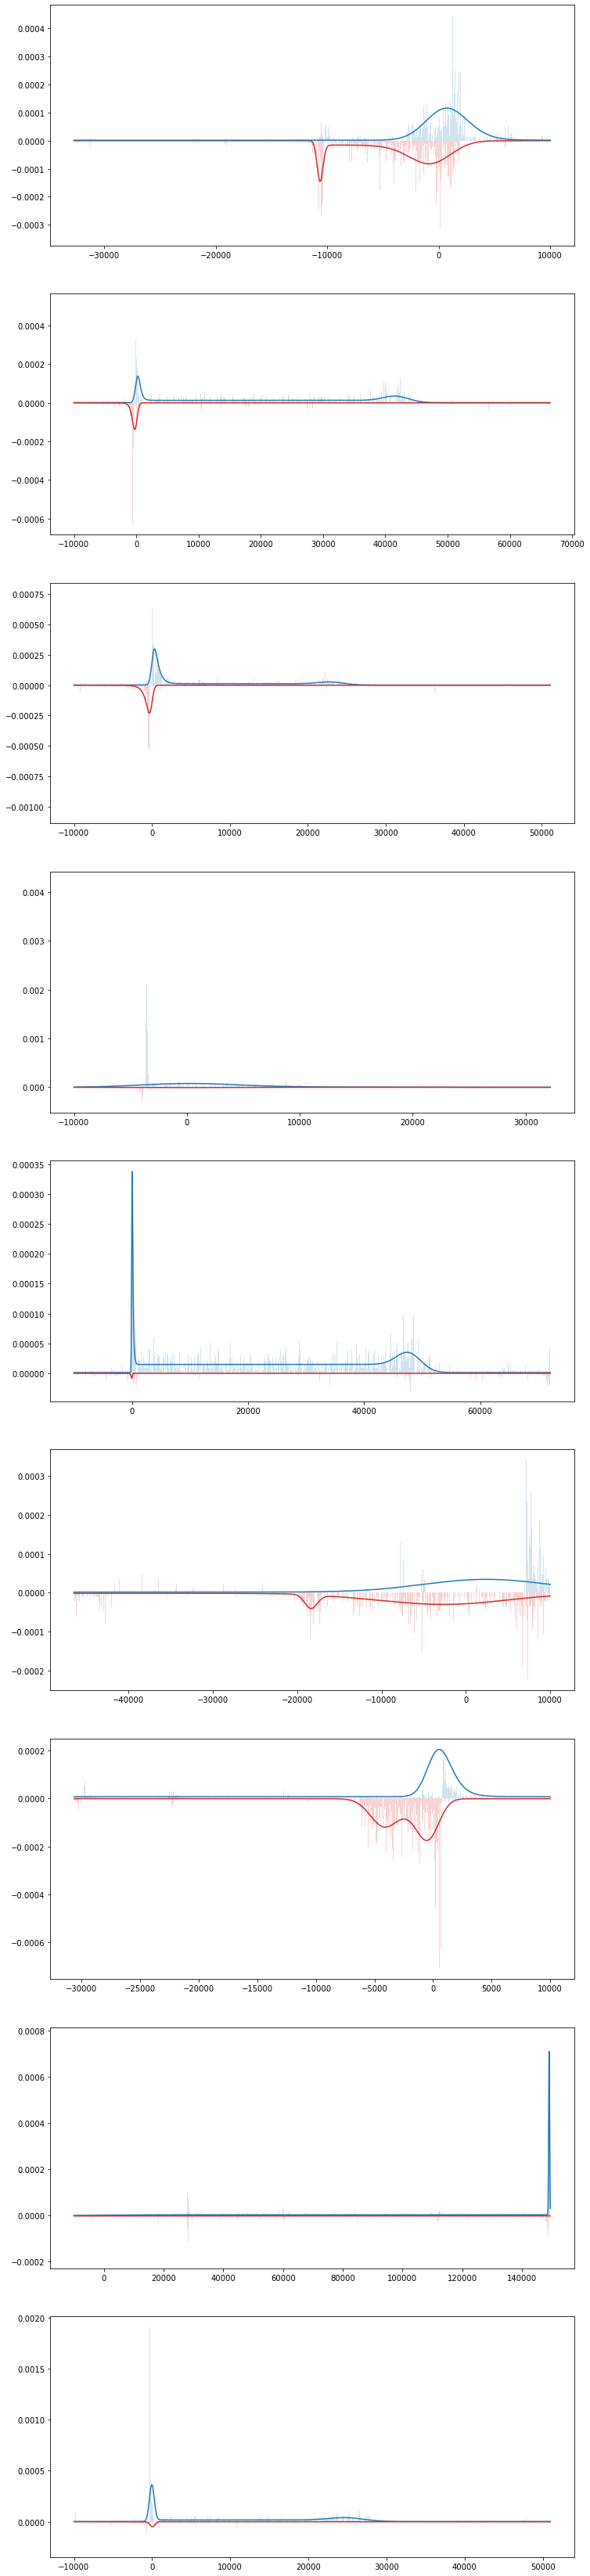

In [6]:
ngenes = len(gene_list)

fig = plt.figure(figsize=[12,60])
gs = GridSpec(ngenes, 1)
axes = [fig.add_subplot(gs[i, :]) for i in range(ngenes)]

for gid, ax in zip(gene_list, axes):
    
    xvals, preads, nreads, strand, model_params = gene_results[gid]
    
    rp.LIET_ax(
        ax,
        **model_params,
        strand = strand,
        xvals = xvals,
        data = (preads, nreads),
        nbins = 1000,
    )
plt.show()

# 3rd 34ery

SLC25A5
xvals range: -10000, 32537
P DATA RANGE: -9997, 31991
N DATA RANGE: -10000, 32537


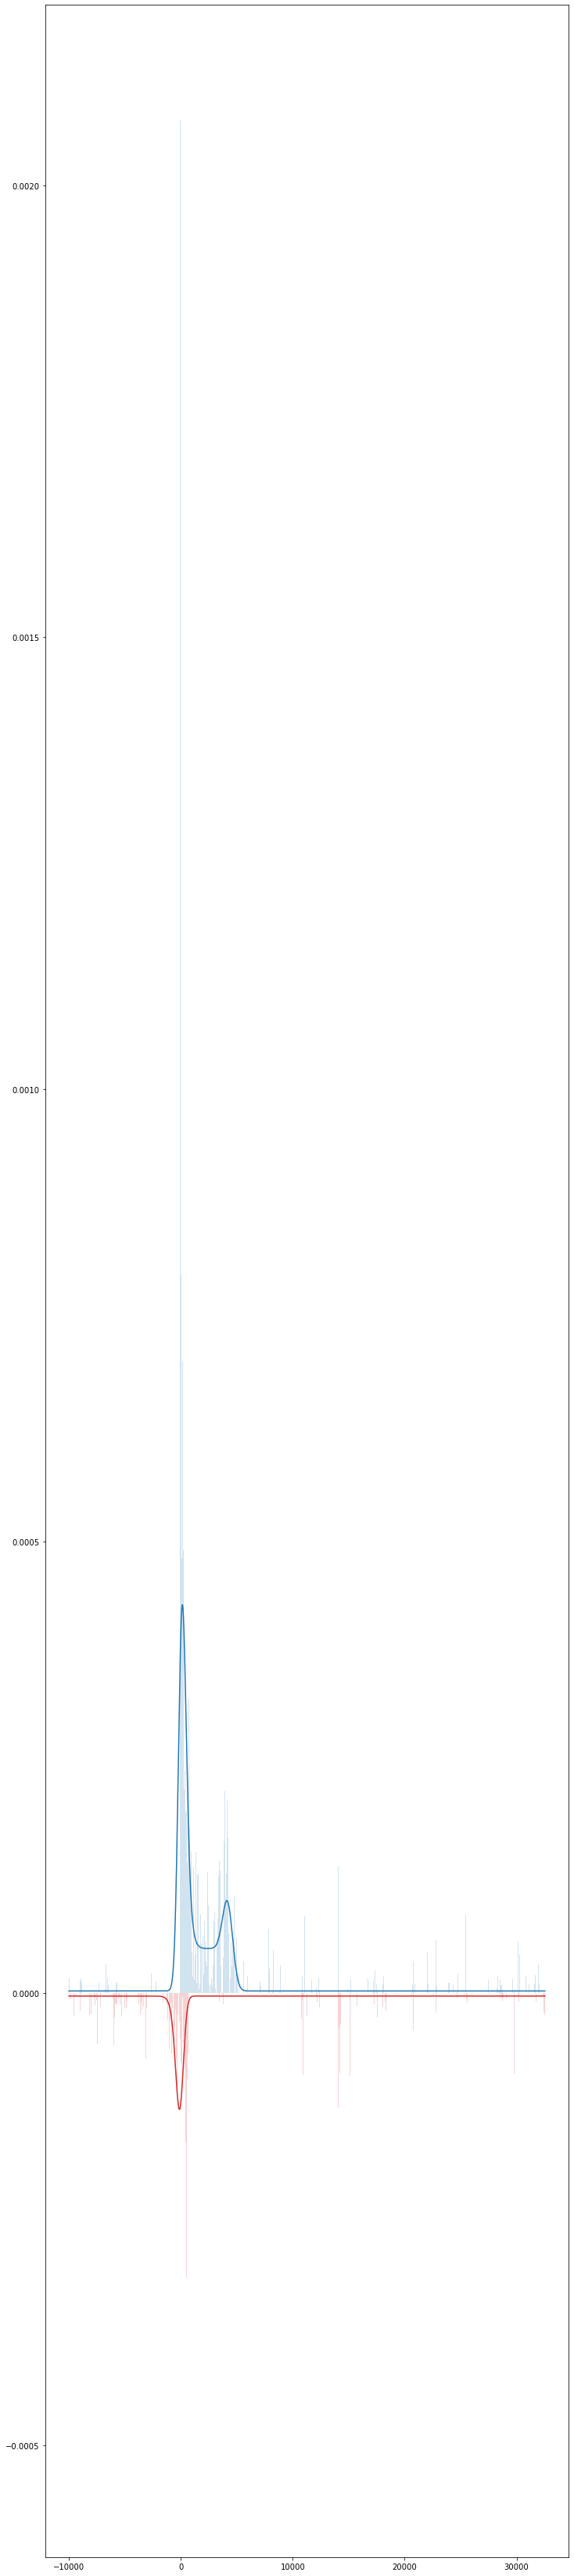

In [30]:
log_file = "/Users/hoto7260/LIET_cell_type/34ery/output/SRR11785048.34ery.1030.liet.log"
results_file = "/Users/hoto7260/LIET_cell_type/34ery/output/SRR11785048.34ery.1030.liet"
config_file = "/Users/hoto7260/LIET_cell_type/34ery/configs/SRR11785048.34ery.config"
ery34_48 = FitParse(res_file=results_file, log_file=log_file)

gene_results3 = res_dict = results_loader(gene_list, config=config_file, result=results_file, log=log_file)
ngenes = len(gene_list)



SLC25A5
xvals range: -10000, 32537
P DATA RANGE: -9997, 31991
N DATA RANGE: -10000, 32537


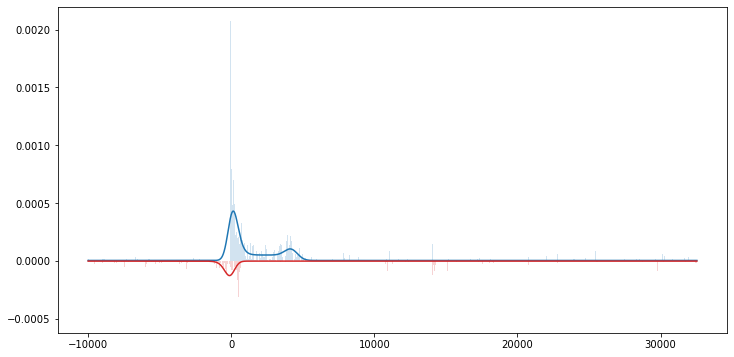

In [33]:
fig = plt.figure(figsize=[12,6])
gs = GridSpec(ngenes, 1)
axes = [fig.add_subplot(gs[i, :]) for i in range(ngenes)]

for gid, ax in zip(gene_list, axes):
    
    xvals3, preads3, nreads3, strand3, model_params3 = gene_results3[gid]
    print(gid)
    rp.LIET_ax(
        ax,
        **model_params3,
        strand = strand3,
        xvals = xvals3,
        data = (preads3, nreads3),
        nbins = 1000,
    )
plt.show()

# Tan 29 mcf7

BHLHE41
ML, MT (preflip): 7.73, 10472.53
ML, MT, ML_A: -7.73, -10472.53, 7.73
xvals range: -32709, 9999
P DATA RANGE: -32343, 9613
N DATA RANGE: -29489, 1380
SMC3
xvals range: -10000, 66480
P DATA RANGE: -3271, 65962
N DATA RANGE: -7886, 55419
RBX1
xvals range: -10000, 51084
P DATA RANGE: -9653, 50994
N DATA RANGE: -9492, 50845
DYNLL2
xvals range: -10000, 32183
P DATA RANGE: -8405, 31669
N DATA RANGE: -5002, 31580
CHMP4B
xvals range: -10000, 72086
P DATA RANGE: -6798, 68678
N DATA RANGE: -5301, 65011
CCDC102A
ML, MT (preflip): 30.49, 43588.42
ML, MT, ML_A: -30.49, -43588.42, 30.49
xvals range: -46432, 9999
P DATA RANGE: -44929, 9453
N DATA RANGE: -46376, 7753
SOCS1
ML, MT (preflip): -55.74, 4021.36
ML, MT, ML_A: 55.74, -4021.36, -55.74
xvals range: -30631, 9999
P DATA RANGE: -28624, 9457
N DATA RANGE: -28750, 6154
TET1
xvals range: -10000, 149470
P DATA RANGE: -9433, 149292
N DATA RANGE: -8609, 149385
SESN2
xvals range: -10000, 50949
P DATA RANGE: -9117, 50455
N DATA RANGE: -8890, 4941

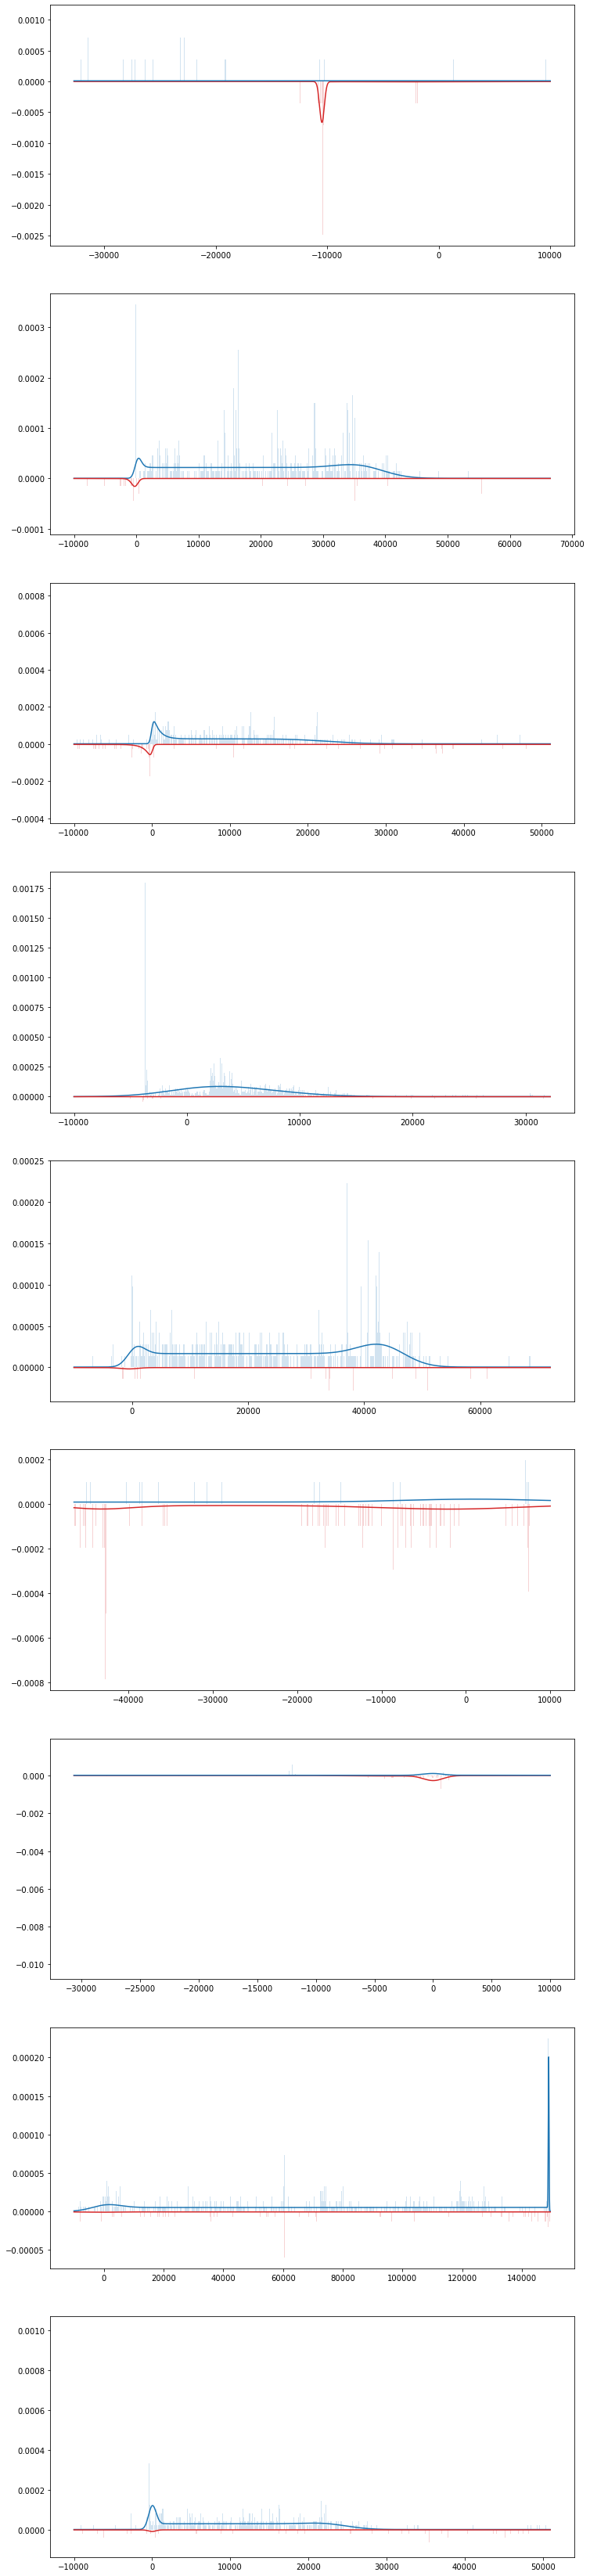

In [15]:
log_file = "/Users/hoto7260/LIET_cell_type/mcf7/output/SRR3541129.mcf7.1030.liet.log"
results_file = "/Users/hoto7260/LIET_cell_type/mcf7/output/SRR3541129.mcf7.1030.liet"
config_file = "/Users/hoto7260/LIET_cell_type/mcf7/configs/SRR3541129.mcf7.config"
mcf7_SR29 = FitParse(res_file=results_file, log_file=log_file)

gene_results4 = res_dict = results_loader(gene_list, config=config_file, result=results_file, log=log_file)
ngenes = len(gene_list)

fig = plt.figure(figsize=[12,60])
gs = GridSpec(ngenes, 1)
axes = [fig.add_subplot(gs[i, :]) for i in range(ngenes)]

for gid, ax in zip(gene_list, axes):
    
    xvals4, preads4, nreads4, strand4, model_params4 = gene_results4[gid]
    print(gid)
    rp.LIET_ax(
        ax,
        **model_params4,
        strand = strand4,
        xvals = xvals4,
        data = (preads4, nreads4),
        nbins = 1000,
    )
plt.show()

# Rao 23

In [34]:
log_file = "/Users/hoto7260/LIET_cell_type/hct116/output/SRZ6290523.hct116.1030.liet.log"
results_file = "/Users/hoto7260/LIET_cell_type/hct116/output/SRZ6290523.hct116.1030.liet"
config_file = "/Users/hoto7260/LIET_cell_type/hct116/configs/SRZ6290523.hct116.config"
hct116_SRZ1 = FitParse(res_file=results_file, log_file=log_file)

gene_results5 = res_dict = results_loader(gene_list, config=config_file, result=results_file, log=log_file)
ngenes = len(gene_list)


SLC25A5
xvals range: -10000, 32537
P DATA RANGE: -10000, 30654
N DATA RANGE: -10000, 32430


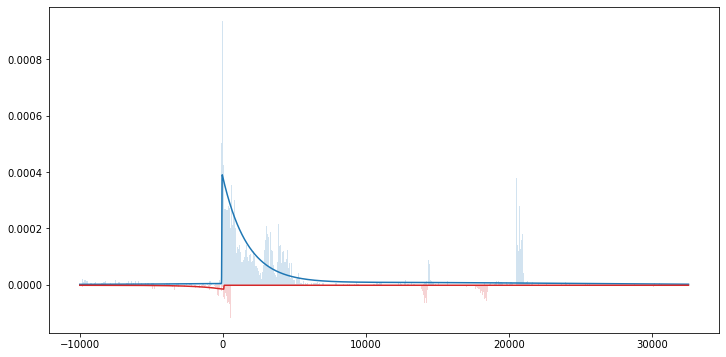

In [35]:
fig = plt.figure(figsize=[12,6])
gs = GridSpec(ngenes, 1)
axes = [fig.add_subplot(gs[i, :]) for i in range(ngenes)]

for gid, ax in zip(gene_list, axes):
    
    xvals5, preads5, nreads5, strand5, model_params5 = gene_results5[gid]
    print(gid)
    rp.LIET_ax(
        ax,
        **model_params5,
        strand = strand5,
        xvals = xvals5,
        data = (preads5, nreads5),
        nbins = 1000,
    )
plt.show()